<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 188.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 201.9 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 143.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 162.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 172.5 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-06-28 12:53:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  47.3MB/s    in 3.4s    

2025-06-28 12:53:56 (45.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



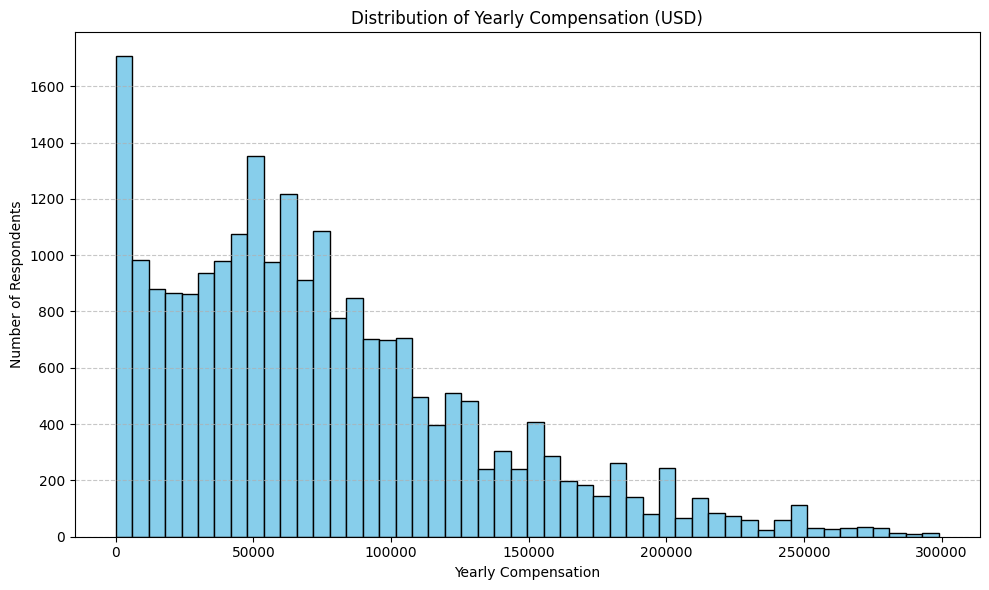

In [4]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Drop missing or zero values in compensation
df_filtered = df['ConvertedCompYearly'].dropna()
df_filtered = df_filtered[df_filtered > 0]

# Optional: Filter extreme outliers for better visualization
df_filtered = df_filtered[df_filtered < 300000]  # adjust if needed

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_filtered, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Yearly Compensation (USD)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



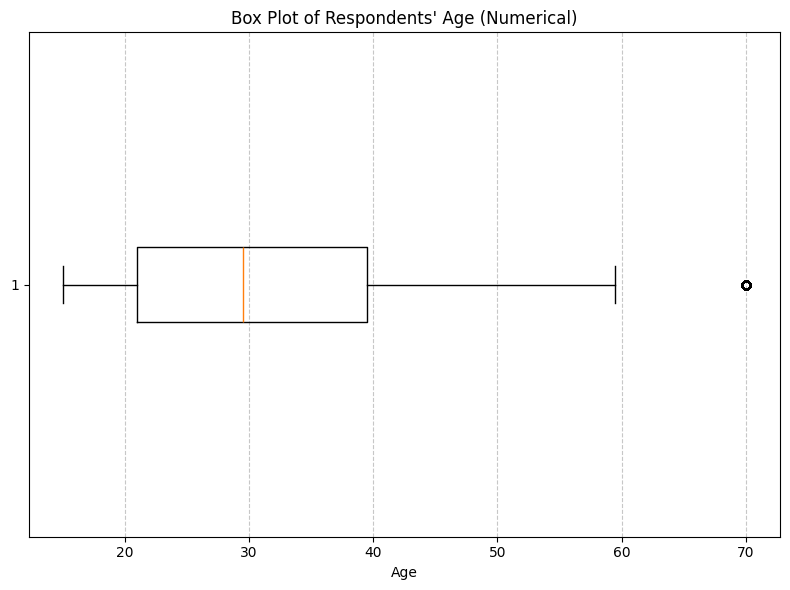

In [5]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Define mapping from age categories to numerical midpoints
age_mapping = {
    "Under 18 years old": 15,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "30-34 years old": 32,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}

# Map age column to numerical
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Drop missing age values
age_data = df['AgeNumeric'].dropna()

# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(age_data, vert=False)
plt.title('Box Plot of Respondents\' Age (Numerical)')
plt.xlabel('Age')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



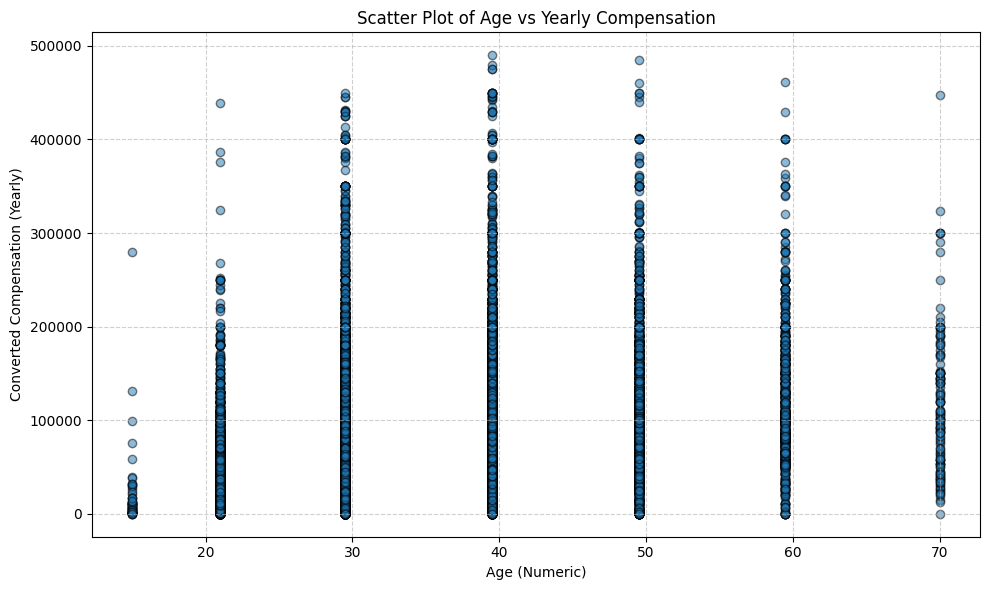

In [6]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Define age mapping
age_mapping = {
    "Under 18 years old": 15,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "30-34 years old": 32,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}

# Apply age mapping
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Drop rows with missing compensation or age
scatter_df = df[['AgeNumeric', 'ConvertedCompYearly']].dropna()

# Optional: Filter to reasonable compensation range (to handle outliers)
scatter_df = scatter_df[scatter_df['ConvertedCompYearly'] < 500000]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(scatter_df['AgeNumeric'], scatter_df['ConvertedCompYearly'], alpha=0.5, edgecolors='k')
plt.title('Scatter Plot of Age vs Yearly Compensation')
plt.xlabel('Age (Numeric)')
plt.ylabel('Converted Compensation (Yearly)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


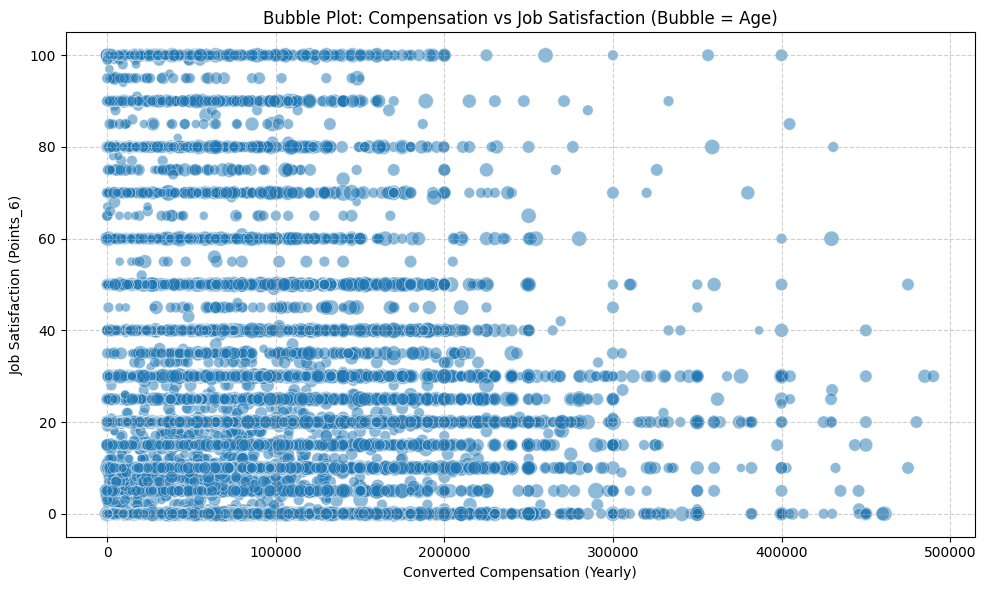

In [7]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("survey-data.csv")

# Convert age categories to numeric midpoints
age_mapping = {
    "Under 18 years old": 15,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "30-34 years old": 32,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Filter data to remove missing values
bubble_df = df[['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNumeric']].dropna()

# Optional: filter extreme compensation values for better visualization
bubble_df = bubble_df[bubble_df['ConvertedCompYearly'] < 500000]

# Create bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(
    bubble_df['ConvertedCompYearly'],
    bubble_df['JobSatPoints_6'],
    s=bubble_df['AgeNumeric']*2,  # scale up bubble size
    alpha=0.5,
    edgecolors='w',
    linewidths=0.5
)
plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble = Age)')
plt.xlabel('Converted Compensation (Yearly)')
plt.ylabel('Job Satisfaction (Points_6)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



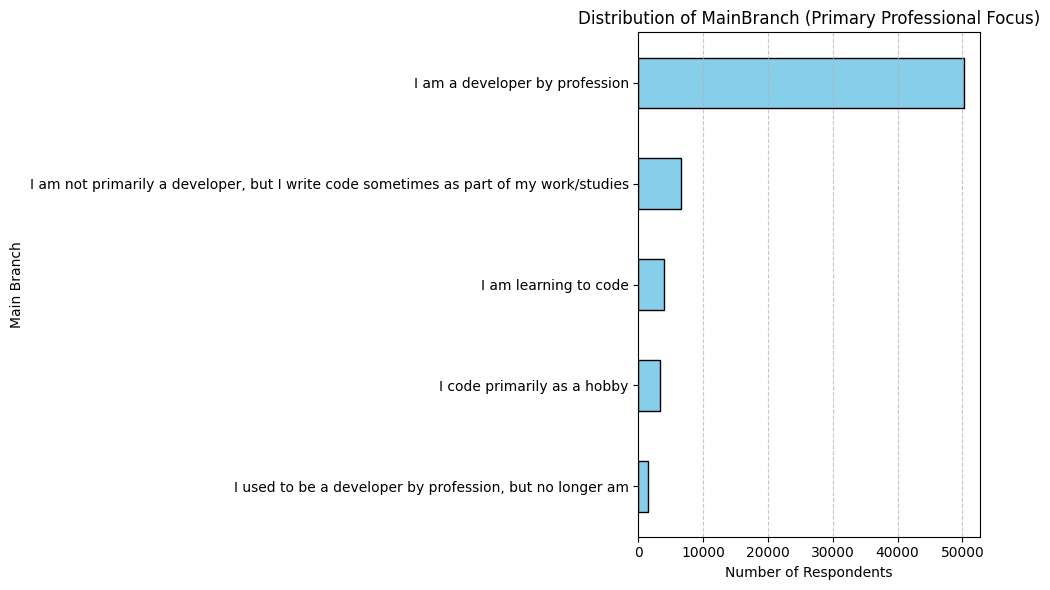

In [8]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("survey-data.csv")

# Count occurrences of each MainBranch value
main_branch_counts = df['MainBranch'].value_counts().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Distribution of MainBranch (Primary Professional Focus)')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



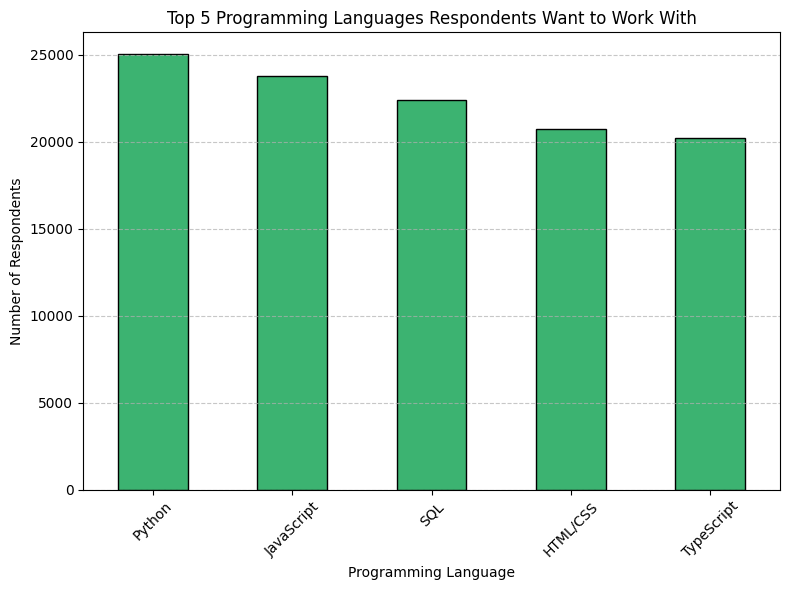

In [9]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("survey-data.csv")

# Drop missing values
lang_series = df['LanguageWantToWorkWith'].dropna()

# Split semicolon-separated values and count frequencies
all_languages = []
for entry in lang_series:
    all_languages.extend([lang.strip() for lang in entry.split(';')])

# Count and sort
lang_counts = pd.Series(all_languages).value_counts().head(5)

# Plot vertical bar chart
plt.figure(figsize=(8, 6))
lang_counts.plot(kind='bar', color='mediumseagreen', edgecolor='black')

plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.ylabel('Number of Respondents')
plt.xlabel('Programming Language')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


<Figure size 1000x600 with 0 Axes>

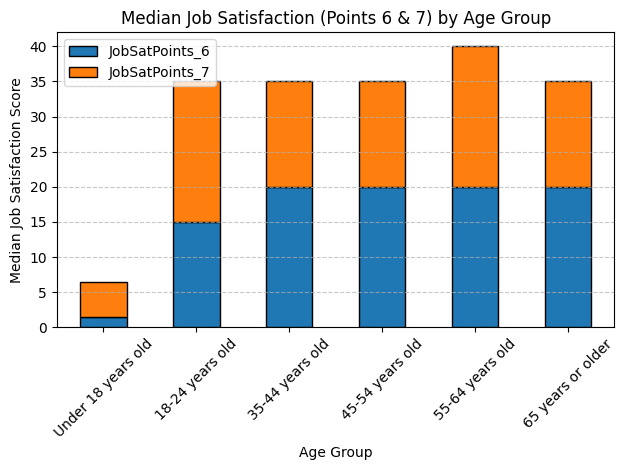

In [10]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Keep only relevant columns and drop rows with missing values
df_filtered = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# Group by Age and calculate the median of each satisfaction point
grouped = df_filtered.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Sort age groups logically if needed (optional but useful)
age_order = [
    'Under 18 years old', '18-24 years old', '25-29 years old', '30-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
grouped = grouped.reindex(age_order).dropna()

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], edgecolor='black')

plt.title('Median Job Satisfaction (Points 6 & 7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Score')
plt.xticks(rotation=45)
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



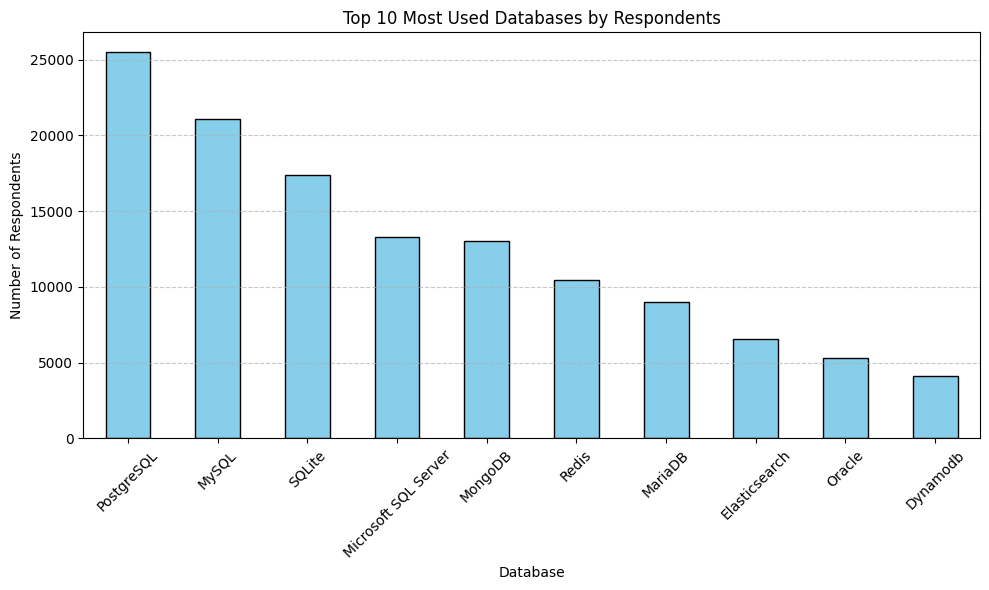

In [11]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("survey-data.csv")

# Drop rows with missing values in DatabaseHaveWorkedWith
db_series = df['DatabaseHaveWorkedWith'].dropna()

# Split semicolon-separated values and count frequencies
all_dbs = []
for entry in db_series:
    all_dbs.extend([db.strip() for db in str(entry).split(';')])

# Count database frequencies
db_counts = pd.Series(all_dbs).value_counts().head(10)  # Top 10 databases

# Plot the bar chart
plt.figure(figsize=(10, 6))
db_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 Most Used Databases by Respondents')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



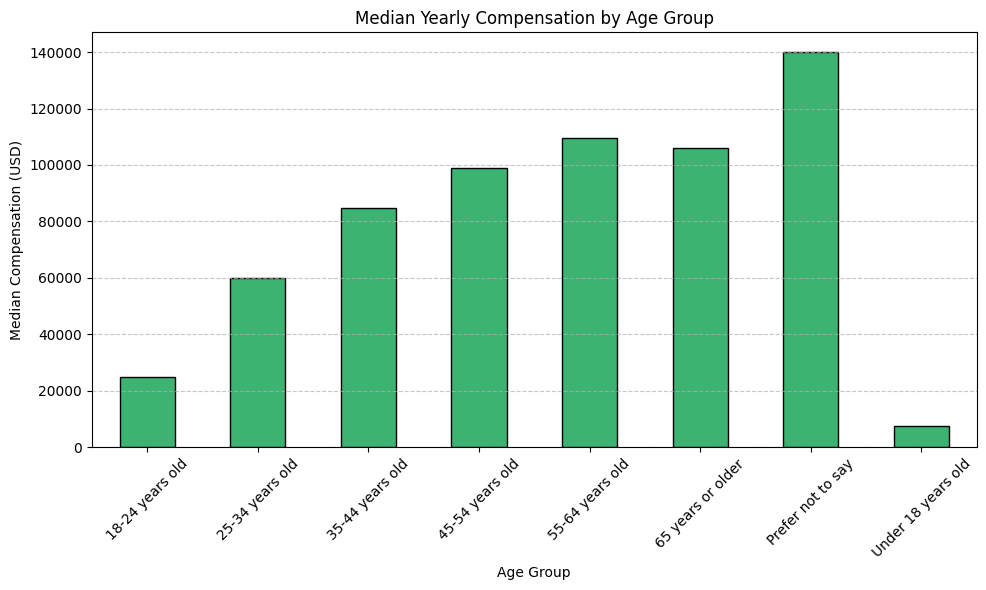

In [12]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("survey-data.csv")

# Drop rows with missing compensation or age
df_filtered = df[['Age', 'ConvertedCompYearly']].dropna()

# Group by Age and calculate median compensation
grouped_data = df_filtered.groupby('Age')['ConvertedCompYearly'].median().sort_index()

# Plot
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='mediumseagreen', edgecolor='black')

plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [ ]:
## Write your code here

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
